## Exercise Description: Predicting Enemy Military Personnel Losses with Linear Regression and Decision Trees

**Author:** Prof. Manoel Gadi (year 2025) – mfalonso@faculty.ie.edu

**Objective:** This exercise aims to provide hands-on experience in building predictive models using both Linear Regression in Excel and Decision Tree Regression in Python. You will learn to preprocess data, train models, evaluate performance, and interpret results to make informed recommendations.

**Dataset:** `war_timeseries_dataset.xlsx` (available at: [https://github.com/manoelgadi/IE_MIM_PA/raw/refs/heads/main/war_timeseries_dataset.xlsx](https://github.com/manoelgadi/IE_MIM_PA/raw/refs/heads/main/war_timeseries_dataset.xlsx))

**Target Variable:** Target - Enemy Military Personnel Losses

**Independent Variables:** Aircraft Arsenal, Helicopters Arsenal, Tanks Arsenal, Armoured Combat Vehicles Arsenal, Artillery Systems Arsenal, Air Defense Systems Arsenal, Multiple Rocket Launchers Arsenal, Vehicles and Fuel Tankers Arsenal, Ships and Boats Arsenal, Tactical Unmanned Aircraft Arsenal

**Note:** The 'Date' variable should not be used in the analysis.

**Scenario:** You are a data analyst tasked with developing a model to predict enemy military personnel losses based on various arsenal features in the provided dataset. General Smith requires your analysis to advise on strategic resource allocation.

**Part 1: Linear Regression in Excel**

1.  **Data Loading:** Open the `war_timeseries_dataset.xlsx` file in Microsoft Excel.
2.  **Linear Regression:**
    * Perform a multiple linear regression analysis using the "Data Analysis" toolpak.
    * Set "Target - Enemy Military Personnel Losses" as the dependent variable (Y) and the independent arsenal variables as the independent variables (X).
    * Exclude the 'Date' column from the independent variables.
3.  **Variable Selection:**
    * Examine the p-values of the coefficients in the regression output.
    * Remove each variable with p-values greater than 0.05 (5%) as they are considered statistically insignificant, one by one, until all variables are significant.
    * Re-run the regression with the remaining significant variables.
4.  **Model Summary:**
    * Document the final linear regression model, including the coefficients, p-values, and R-squared value.
    * Take a screenshot of the final regression output in Excel.
5.  **Investment Recommendation:**
    * Based on the coefficients of the significant variables, recommend where General Smith should invest 1 billion dollars to maximize enemy military personnel losses. Justify your recommendation with the model's findings.

**Part 2: Decision Tree Regression in Python**

1.  **Data Loading and Preparation:**
    * Load the `war_timeseries_dataset.xlsx` file into a pandas DataFrame, specifically reading the "data" sheet.
    * Separate the features (X) and the target variable (y), where the target is "Enemy Military Personnel Losses" (Target).
    * Exclude the 'Date' column from the features (X).
    * Split the dataset into training and testing sets using a 70/30 split, with `random_state=42` for reproducibility.
2.  **Starting Model Training and Prediction:**
    * Train a `DecisionTreeRegressor` model using the training data.
    * Configure the model with the following parameters: `criterion='squared_error'`, `random_state=100`, `max_depth=3`, and `min_samples_leaf=5`.
    * Generate predictions for both the training and testing sets.
3.  **Model Evaluation:**
    * Calculate and print the R-squared (R²) scores for both the training and testing sets to evaluate the model's performance.
    * Analyze the R² scores to assess the model's fit and generalization ability.
4.  **Tree Visualization:**
    * Export the trained Decision Tree as a PNG image (`tree_entropy.png`) using `export_graphviz` and `pydotplus`.
    * Display the generated tree image within the notebook using `IPython.display.Image`.
    * Interpret the visualized tree to understand the decision rules and feature importance.
5.  **Parameter Tuning:**
    * Experiment with different parameters of the `DecisionTreeClassifier` (e.g., `max_depth`, `min_samples_leaf`, `criterion`).
    * Observe how these changes affect the training and testing R-squared scores.
6.  **Overfitting Reduction:**
    * Focus on minimizing the difference between the training and testing R-squared scores (reducing overfitting).
    * Aim for a model that generalizes well to unseen data.
7.  **Optimization Metric:**
    * Your objective is to maximize the following metric: `R_SQUARED_TEST * (1 - |R_SQUARED_TRAIN - R_SQUARED_TEST|)`
    * This metric rewards high test R-squared while penalizing large differences between train and test R-squared, thus encouraging generalization.
8.  **Investment Recommendation:**
    * Based on the interpretation of the Decision Tree, recommend where General Smith should invest 1 billion dollars to maximize enemy military personnel losses. Justify your recommendation with the model's findings.

**Deliverables:**

1.  **Final Excel File:** An Excel file (`.xlsx`) containing the optimized Linear Regression model with only the significant variables.
2.  **Final Jupyter Notebook:** A Jupyter Notebook (`.ipynb`) containing the optimized Decision Tree Regression model with the final parameters used and the evaluation results.
3.  **Final Report:** A PDF or Word document (`.pdf` or `.docx`) containing the following:
    * **Linear Regression Summary:**
        * Summarize the final linear regression model, including the significant variables, coefficients, p-values, and R-squared value.
        * Include a screenshot of the final regression output from Excel.
        * Provide the investment recommendation for General Smith based on the linear regression model.
    * **Decision Tree Regression Summary:**
        * Summarize the final decision tree model, including the used parameters, R-squared values for training and testing, and a screenshot of the visualized tree.
        * Provide the investment recommendation for General Smith based on the decision tree model.
    * **Comparison of Recommendations:**
        * Compare the investment recommendations derived from the linear regression and decision tree models.
        * Highlight any differences and similarities in the recommendations.
    * **Model Comparison and Discussion:**
        * Explain why the recommendations from the two models might differ.
        * Discuss which model (Linear Regression or Decision Tree Regression) seems more suitable for this problem and justify your choice. Consider factors such as model interpretability, performance, and the nature of the data.

This exercise will enable you to apply and compare two different regression techniques, understand their strengths and weaknesses, and make data-driven recommendations in a practical scenario. Good luck!


# Preparation

In [1]:
import pandas as pd
df = pd.read_excel('https://github.com/manoelgadi/IE_MIM_PA/raw/refs/heads/main/war_timeseries_dataset.xlsx', sheet_name="data")

In [2]:
X = df.iloc[:, 1:-1]  # Features
y = df.iloc[:, -1]   # Target

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
from sklearn.tree import DecisionTreeRegressor
# criterion{'squared_error', 'friedman_mse', 'absolute_error', 'poisson'}
clf = DecisionTreeRegressor(criterion = 'squared_error', random_state = 100, max_depth=3, min_samples_leaf=5)
fitted_model = clf.fit(X_train, y_train)
y_pred_train = fitted_model.predict(X_train)
y_pred_test  = fitted_model.predict(X_test)
from sklearn.metrics import r2_score
print("R-squared TRAIN: {0}".format(r2_score(y_train, y_pred_train)))
print("R-squared TEST: {0}".format(r2_score(y_test, y_pred_test)))


R-squared TRAIN: 0.8470903456328394
R-squared TEST: 0.7103553846572488


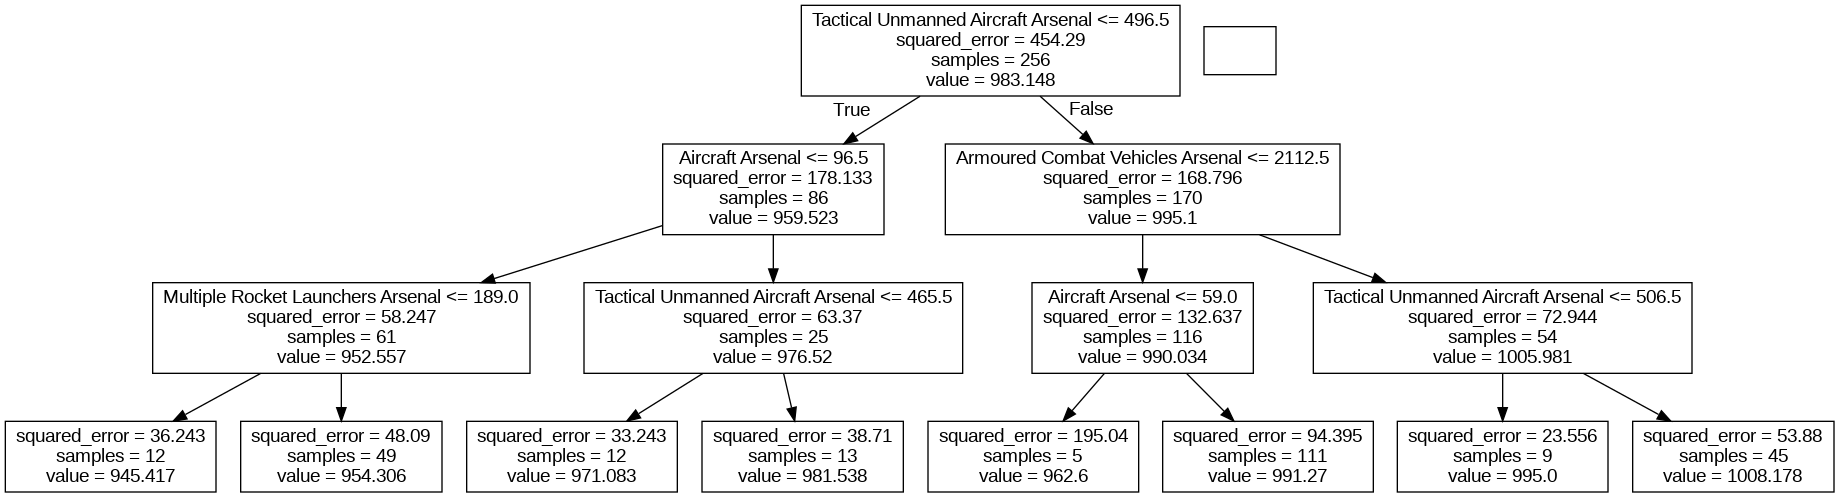

In [5]:
from sklearn.tree import export_graphviz
import pydotplus
from io import StringIO

#install pydotplus conda install -c conda-forge pydotplus
# install graphviz conda install graphviz

dot_data= StringIO()
export_graphviz(clf, out_file=dot_data,feature_names=X_train.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png("tree_entropy.png")

from IPython.display import Image
Image(filename='tree_entropy.png')